In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn
from scipy import stats
from scipy.optimize import curve_fit
import uncertainties
import scipy.constants as constants
import seaborn as sns

In [90]:
df=pd.read_csv("Screw_calibration.csv")
df["Uncert Ringcount"]=1*np.ones(10) #uncertainty of the Ringcounts
df["Uncert Distance"]=0.01*np.ones(10) #smallest readable distance
df

,Measurement,Ringcount,Distance,Uncert Ringcount,Uncert Distance
0,1,20,6.93,1.0,0.01
1,2,21,6.86,1.0,0.01
2,3,22,6.79,1.0,0.01
3,4,23,6.72,1.0,0.01
4,5,24,6.65,1.0,0.01
5,6,25,6.57,1.0,0.01
6,7,26,6.49,1.0,0.01
7,8,27,6.40,1.0,0.01
8,9,28,6.32,1.0,0.01
9,10,29,6.23,1.0,0.01


In [91]:
distance_start=7
distance_screw=[]
for i in range(len(df[" Distance"])):
    if i==0:
        distance_screw.append(distance_start-df[" Distance"][i])
    else:
        distance_screw.append(abs(df[" Distance"][i]-df[" Distance"][i-1]))
distance_screw=np.array(distance_screw)


#Uncertainties
dist_screw_uncert=np.sqrt(2*0.01**2)*np.ones(10)*100/2 #inch
dist_screw_uncert

distance_screw=distance_screw*100
distance_screw #distance in meters


array([7., 7., 7., 7., 7., 8., 8., 9., 8., 9.])

$d_m = m \frac{\lambda_0}{2}$
But here we have a number of Ringes that we went through, which means a number of whole $\lambda$-s, hence we get the same pattern as before after the movement


In [92]:
lambda_0=632.8E-9 #m
distance_wavelength=df[" Ringcount"]*lambda_0/2
distance_wavelength=np.array(distance_wavelength)
distance_wavelength #m
dist_wave_uncert=lambda_0*np.ones(10)/2
distance_wavelength

array([6.3280e-06, 6.6444e-06, 6.9608e-06, 7.2772e-06, 7.5936e-06,
       7.9100e-06, 8.2264e-06, 8.5428e-06, 8.8592e-06, 9.1756e-06])

In [93]:
dist_wave_uncert

array([3.164e-07, 3.164e-07, 3.164e-07, 3.164e-07, 3.164e-07, 3.164e-07,
       3.164e-07, 3.164e-07, 3.164e-07, 3.164e-07])

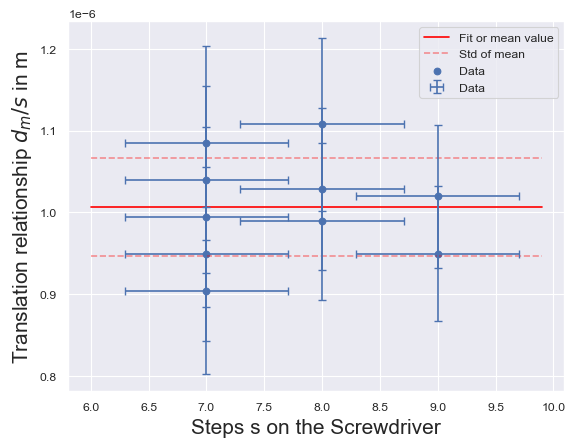

1.0065161111111118e-06
5.965411881560852e-08


In [94]:
y=distance_wavelength/distance_screw
y_err=np.sqrt((dist_wave_uncert/distance_screw)**2 + (distance_wavelength*dist_screw_uncert/distance_screw**2)**2)
x=distance_screw


ymean=y.mean()
yuncert=np.std(y)


sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.plot(np.arange(6, 10, 0.1), ymean*np.ones(40), label="Fit or mean value", color="red")
plt.plot(np.arange(6, 10, 0.1), (ymean+yuncert)*np.ones(40),"--", label="Std of mean", color="red", alpha=0.4)
plt.plot(np.arange(6, 10, 0.1), (ymean-yuncert)*np.ones(40),"--", color="red", alpha=0.4)
plt.errorbar(x, y, yerr=y_err, xerr=dist_screw_uncert, fmt='None', capsize=3, label="Data")
plt.scatter(x, y, label="Data")
plt.xlabel(r'Steps s on the Screwdriver', size=15)
plt.ylabel(r"Translation relationship $d_m/s$ in m", size=15)
#plt.suptitle("Translation $d_m$ dependent of adjustement path s", size=20)
plt.legend(loc='upper right')
plt.savefig("translation.png", dpi=500, bbox_inches="tight")
plt.show()

print(ymean)
print(yuncert)

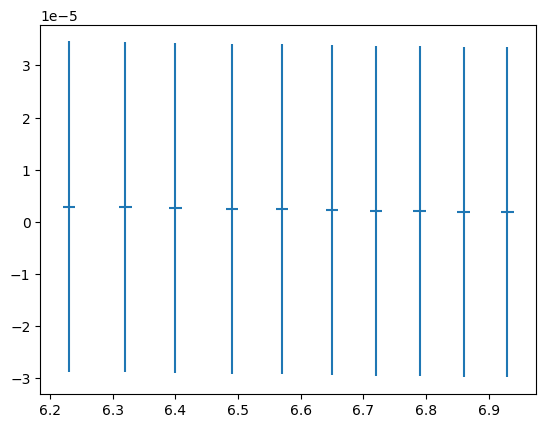

In [21]:
y=distance_wavelength/df[" Distance"]
y_err=np.sqrt((dist_wave_uncert/df["Uncert Distance"])**2 + (distance_wavelength*df["Uncert Distance"]/df[" Distance"]**2)**2)

x=df[" Distance"]
plt.errorbar(x, y, yerr=y_err, xerr=df["Uncert Distance"], fmt='None')
plt.show()